In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
datasets = pd.read_excel("/content/Sexual Harassment Data for Machine Learning Project (1).xlsx", sheet_name="Sheet1")


In [3]:
datasets['Area'] = datasets['Area'].replace({'Ramapuram': 1, 'West Mambalam': 2, 'Adyar': 3})
datasets['Zone'] = datasets['Zone'].replace({
    'Aanandam Nagar': 1, 'Ambal Nagar': 2, 'Amman Nagar': 3, 'Chidambaram Nagar': 4, 'Easwaran Nagar': 5,
    'Gokulam Colony': 6, 'Moogambigai Nagar': 7, 'Mullai Nagar': 8, 'Royala Nagar': 9, 'Sakthi Nagar': 10,
    'Suresh Nagar': 11, 'Tamil Nagar': 12, 'Thiru Nagar': 13, 'Venkateshwara Nagar': 14, 'Postal Colony': 15,
    'RamaKrishnapuram': 16, 'Vivekanandapuram': 17, 'Moovendar Colony': 18, 'Kasi Viswanathar Colony': 19,
    'Pannerselvam Nagar': 20, 'Shastri Nagar': 21, 'Subramaniam Nagar': 22, 'Baktavatsalm Nagar': 23,
    'Venkateshwar Nagar': 24, 'Teachers Colony': 25, 'South Kesavaperumalpuram': 26
})
datasets['Time'] = datasets['Time'].replace({'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4})
datasets['People.Frequency'] = datasets['People.Frequency'].replace({'Low': 1, 'Medium': 2, 'High': 3})
datasets['Is.Police_Station'] = datasets['Is.Police_Station'].replace({'Yes': 1, 'No': 2})
datasets['Is.Bar'] = datasets['Is.Bar'].replace({'Yes': 1, 'No': 2})
datasets['Tier'] = datasets['Tier'].replace({'Inner': 1, 'Middle': 2, 'Outer': 3})
datasets['Residence.Level'] = datasets['Residence.Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})
datasets['Class'] = datasets['Class'].replace({'Safe': 1, 'Unsafe': 2})



In [4]:
X = datasets.drop('Class', axis=1)
y = datasets['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)



In [5]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [7]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_pca, y_train)
y_pred = logistic_regressor.predict(X_test_pca)

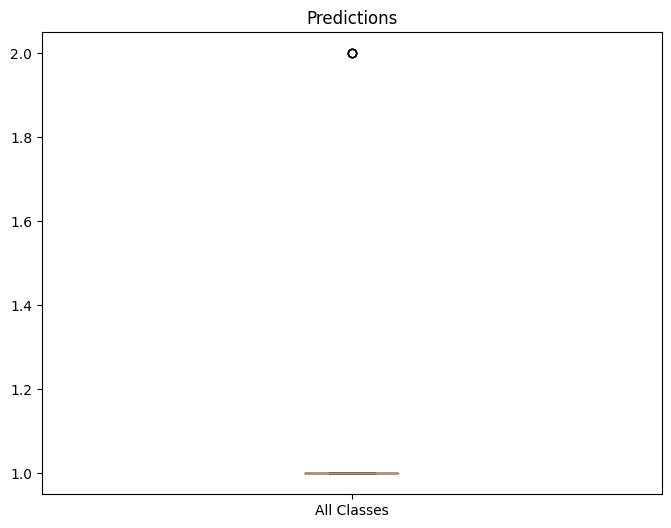

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(y_pred)
plt.title('Predictions')
plt.xticks([1], ['All Classes'])
plt.show()

In [9]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [10]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
import joblib

joblib.dump(multi_regressor, 'multivariate_regression_model.pkl')


['multivariate_regression_model.pkl']

In [12]:
loaded_multivariate_model = joblib.load('multivariate_regression_model.pkl')


In [13]:
multivariate_predictions = loaded_multivariate_model.predict(X_test_scaled)


In [14]:
from sklearn.metrics import mean_squared_error
multivariate_mse = mean_squared_error(y_test, multivariate_predictions)


In [15]:
print("Multivariate Regression Predictions:", multivariate_predictions)
print("Multivariate Regression Mean Squared Error:", multivariate_mse)

Multivariate Regression Predictions: [0.91427826 1.25063173 1.50698622 1.14165665 1.65994464 1.29881585
 1.3200106  1.48707757 0.94750494 1.34072521 0.99423025 1.32081656
 1.67143345 1.20978031 1.6607506  1.26327643 1.00253669 0.83127619
 0.91955589 1.26465923 1.3650828  1.10806238 1.37790209 1.04154862
 1.50214898 1.43241136]
Multivariate Regression Mean Squared Error: 0.11699769352774406


In [16]:
print("\nMultivariate Regression:")
for actual, predicted in zip(y_test, multivariate_predictions):
    print("Actual:", actual, "Predicted:", predicted)


Multivariate Regression:
Actual: 1 Predicted: 0.9142782623426029
Actual: 1 Predicted: 1.2506317318096438
Actual: 2 Predicted: 1.5069862203366233
Actual: 1 Predicted: 1.1416566471890797
Actual: 1 Predicted: 1.659944640731037
Actual: 1 Predicted: 1.298815848318479
Actual: 1 Predicted: 1.3200105966491957
Actual: 1 Predicted: 1.4870775663434932
Actual: 1 Predicted: 0.9475049425085044
Actual: 1 Predicted: 1.3407252140117107
Actual: 1 Predicted: 0.9942302490059226
Actual: 1 Predicted: 1.3208165600185808
Actual: 2 Predicted: 1.6714334472986299
Actual: 1 Predicted: 1.2097803064271209
Actual: 1 Predicted: 1.6607506041004223
Actual: 1 Predicted: 1.263276432326489
Actual: 1 Predicted: 1.0025366942991134
Actual: 1 Predicted: 0.8312761875634732
Actual: 1 Predicted: 0.9195558904026345
Actual: 1 Predicted: 1.264659225006144
Actual: 1 Predicted: 1.3650828045199497
Actual: 1 Predicted: 1.1080623847254487
Actual: 1 Predicted: 1.3779020863916807
Actual: 1 Predicted: 1.0415486169246397
Actual: 2 Predicte